In [1]:
from IPython.display import Image    ## to display images
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler ## for scaling the input data
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_digits       ## mnist data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
## dataset 

digits = load_digits()

In [3]:
data = digits.images   ## features from digits
target = digits.target ## labels from digits

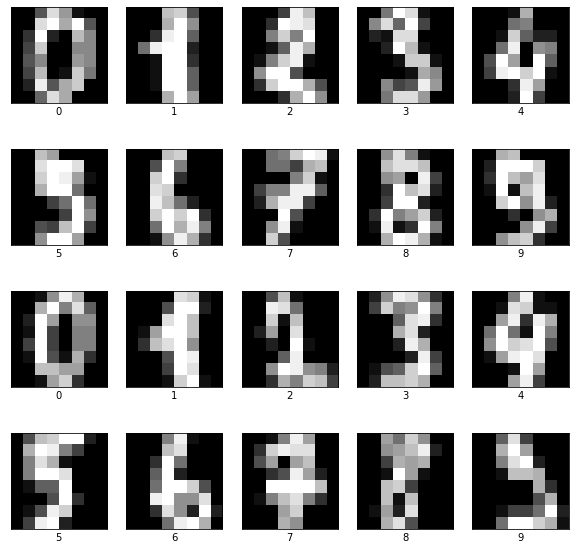

In [5]:
## plotting some images

plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[i], cmap='gray')
    plt.xlabel(target[i])
plt.show()

In [30]:
print("Data shape is: ", data.shape)
print("Target shape is: ", target.shape)

Data shape is:  (1797, 8, 8)
Target shape is:  (1797,)


In [31]:
data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [35]:
data = data.reshape((1797, 64, )) ## reshaping the input befor passing the input to MinMaxScaler

In [37]:
## scaling the input

min_max_sc = MinMaxScaler()
X = min_max_sc.fit_transform(data)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=42)

In [39]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1347, 64)
X_test shape:  (450, 64)
y_train shape:  (1347,)
y_test shape:  (450,)


In [41]:
## logistic Regression
lg = LogisticRegression()

## training
lg.fit(X_train, y_train)

C:\Users\jgaur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
## prediction

pred = lg.predict(X_test)

---------------------------------------------CLassification Report----------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      1.00      0.99        38
           3       1.00      0.93      0.97        46
           4       1.00      0.98      0.99        55
           5       0.93      0.95      0.94        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.93      0.97      0.95        38
           9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

-------------------------------------------Accuracy Score -------------------------------------------------------
0.971111111111

<AxesSubplot:>

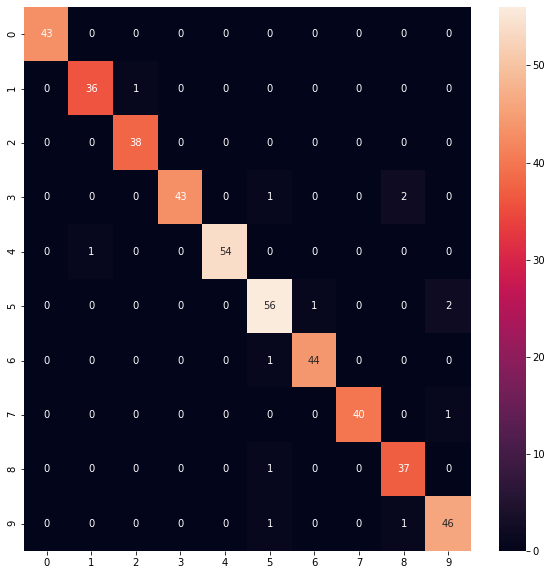

In [46]:
print("---------------------------------------------CLassification Report----------------------------------------------")
print(classification_report(y_test, pred))

print("-------------------------------------------Accuracy Score -------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("-----------------------------------------------Confusion Matrix -----------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [49]:
pd.DataFrame({'Actual': y_test, 'Predicted': pred}).head(50)

,Actual,Predicted
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2
5,1,2
6,5,5
7,2,2
8,5,5
9,2,2
